## The two visualizations show the causal relatinoships ("granger" causal relationships) betwen variables recorded by Fitbit over the course of one year.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import statsmodels.formula.api as smf 
import collections
import scipy.stats
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
from tigramite.models import LinearMediation, Prediction
import pickle

%matplotlib inline     
sns.set_style('white')

In [2]:
cd /Users/charlesmartens/Google Drive/jobs/data science fellowships/

/Users/charlesmartens/Google Drive/jobs/data science fellowships


In [3]:
# link for fitbit data:
# data found at https://algo-data.quora.com/Data-sets-of-any-type-some-links
# csv for activity: https://drive.google.com/file/d/0Bx4yoK5aogTSbGJ2WlkwYjlHejQ/view
# csv for sleep: https://drive.google.com/file/d/0Bx4yoK5aogTSMUFqRjVNcko5WlU/view    

# (alt fitbit data with hr ts: https://zenodo.org/record/53894#.XFXk9s9KgWp)

In [4]:
with open('results_public_fitbit.pkl', 'rb') as picklefile:
    results_public_fitbit = pickle.load(picklefile)

with open('link_matrix_public_fitbit.pkl', 'rb') as picklefile:
    link_matrix_public_fitbit = pickle.load(picklefile)

with open('var_names_public_fitbi.pkl', 'rb') as picklefile:
    var_names_public_fitbit = pickle.load(picklefile)

In [6]:
#var_names_public_fitbit
# rename so more intuitive
var_names_public_fitbit = ['sedentary', 'intense activity','steps',
                           'sleep duration', 'awakenings in sleep']

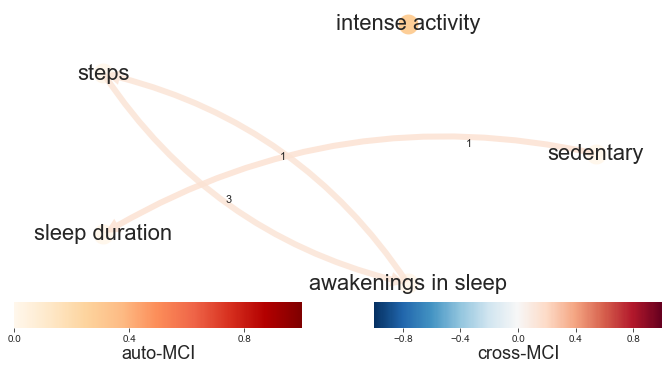

In [7]:
tp.plot_graph(
    val_matrix=results_public_fitbit['val_matrix'],
    link_matrix=link_matrix_public_fitbit,
    var_names=var_names_public_fitbit,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    figsize=(10,6), link_label_fontsize=11, label_fontsize=18,
    node_label_size=22, alpha=.8, arrowhead_size=25
    )

### In the above graph, the nodes represent the variables recorded by the Fitbit device. The direction edges (i.e., arrows) between these nodes show possible causal pathways. The color of the pathways reflects the nature of the relationship: reds reflect positive relationships (an increase in one variable relates to an increase in another variable), blues reflect negative/inverse relationshps. The color of the nodes reflects the degree to which each variable is autocorrelated (i.e., lagged/prior datapoints correlate with subsequent datapoints).  

### For example, for this particular individual, more awakenings during sleep appears to cause or predict more steps taken the next day.

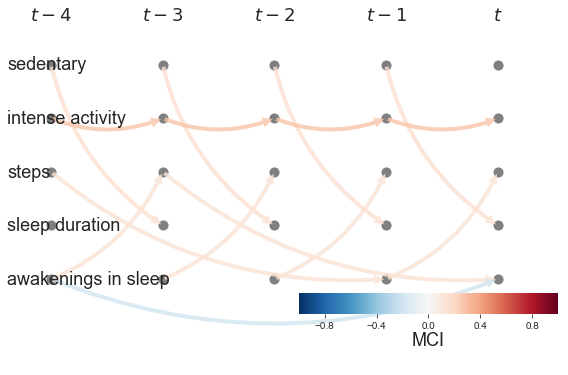

In [9]:
# Plot time series graph
tp.plot_time_series_graph(
    val_matrix=results_public_fitbit['val_matrix'],
    link_matrix=link_matrix_public_fitbit,
    var_names=var_names_public_fitbit,
    link_colorbar_label='MCI',
    figsize=(9,5), label_fontsize=18,
    node_label_size=22, alpha=.8, arrowhead_size=25
    )

### The above graph shows the "causal" relationships over time. The top x-axis reflects time and t-1, t-2, and t-3 reflect lags of 1, 2 and 3 days, respectively. For example, being sedentary during this person's awake hours predicts longer sleep duration the following night.